In [1]:
import numpy as np
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error

## Dataset

In [2]:
df_c = pd.read_csv("rating_pred.csv")

In [3]:
print(df_c)

            userid  rating  contest1  contest2  contest3  contest4  contest5  \
0       3143927301    2115    2078.0    2055.0    2115.0    2047.0    2024.0   
1       1876577621    2254    2194.0    2114.0    2152.0    2179.0    2211.0   
2       6397741793    2344    2120.0    2206.0    2147.0    2234.0    2294.0   
3       3090123616    2224    2224.0    2222.0    2166.0    2116.0    2029.0   
4       9564162806    2128    2128.0    2120.0    2072.0    2018.0    1963.0   
...            ...     ...       ...       ...       ...       ...       ...   
2690  parklinkivic    1398       NaN       NaN       NaN       NaN       NaN   
2691      velraman    1398       NaN       NaN       NaN       NaN       NaN   
2692    katygolova    1398       NaN       NaN       NaN       NaN       NaN   
2693      sergi123    1398       NaN       NaN       NaN       NaN       NaN   
2694           ATR    1398       NaN       NaN       NaN       NaN       NaN   

      contest6  contest7  contest8  con

In [4]:
df_c.shape

(2695, 12)

In [5]:
list(df_c. columns)

['userid',
 'rating',
 'contest1',
 'contest2',
 'contest3',
 'contest4',
 'contest5',
 'contest6',
 'contest7',
 'contest8',
 'contest9',
 'contest10']

In [6]:
df_c.drop("userid", axis=1, inplace=True)

In [7]:
print(df_c)

      rating  contest1  contest2  contest3  contest4  contest5  contest6  \
0       2115    2078.0    2055.0    2115.0    2047.0    2024.0    2010.0   
1       2254    2194.0    2114.0    2152.0    2179.0    2211.0    2154.0   
2       2344    2120.0    2206.0    2147.0    2234.0    2294.0    2090.0   
3       2224    2224.0    2222.0    2166.0    2116.0    2029.0    2113.0   
4       2128    2128.0    2120.0    2072.0    2018.0    1963.0    2039.0   
...      ...       ...       ...       ...       ...       ...       ...   
2690    1398       NaN       NaN       NaN       NaN       NaN       NaN   
2691    1398       NaN       NaN       NaN       NaN       NaN       NaN   
2692    1398       NaN       NaN       NaN       NaN       NaN       NaN   
2693    1398       NaN       NaN       NaN       NaN       NaN       NaN   
2694    1398       NaN       NaN       NaN       NaN       NaN       NaN   

      contest7  contest8  contest9  contest10  
0       1953.0    1936.0    2042.0     

## Data pre processing

In [8]:
df_c.isna().sum()

rating          0
contest1     1206
contest2     1150
contest3     1008
contest4      991
contest5      959
contest6     1091
contest7      941
contest8      959
contest9     1159
contest10     975
dtype: int64

In [9]:
df_c.shape

(2695, 11)

In [10]:
for i in df_c.columns:
    nas = df_c[i].isna().sum()
    if nas > 0:
        df_c[i].fillna(df_c[i].median(), inplace=True)

In [11]:
print(df_c)

      rating  contest1  contest2  contest3  contest4  contest5  contest6  \
0       2115    2078.0    2055.0    2115.0    2047.0    2024.0    2010.0   
1       2254    2194.0    2114.0    2152.0    2179.0    2211.0    2154.0   
2       2344    2120.0    2206.0    2147.0    2234.0    2294.0    2090.0   
3       2224    2224.0    2222.0    2166.0    2116.0    2029.0    2113.0   
4       2128    2128.0    2120.0    2072.0    2018.0    1963.0    2039.0   
...      ...       ...       ...       ...       ...       ...       ...   
2690    1398    2148.0    2098.0    2061.0    2025.5    1993.5    2003.0   
2691    1398    2148.0    2098.0    2061.0    2025.5    1993.5    2003.0   
2692    1398    2148.0    2098.0    2061.0    2025.5    1993.5    2003.0   
2693    1398    2148.0    2098.0    2061.0    2025.5    1993.5    2003.0   
2694    1398    2148.0    2098.0    2061.0    2025.5    1993.5    2003.0   

      contest7  contest8  contest9  contest10  
0       1953.0    1936.0    2042.0     

In [12]:
df_c.isna().sum()

rating       0
contest1     0
contest2     0
contest3     0
contest4     0
contest5     0
contest6     0
contest7     0
contest8     0
contest9     0
contest10    0
dtype: int64

## Showing contest scores distribution among ranks

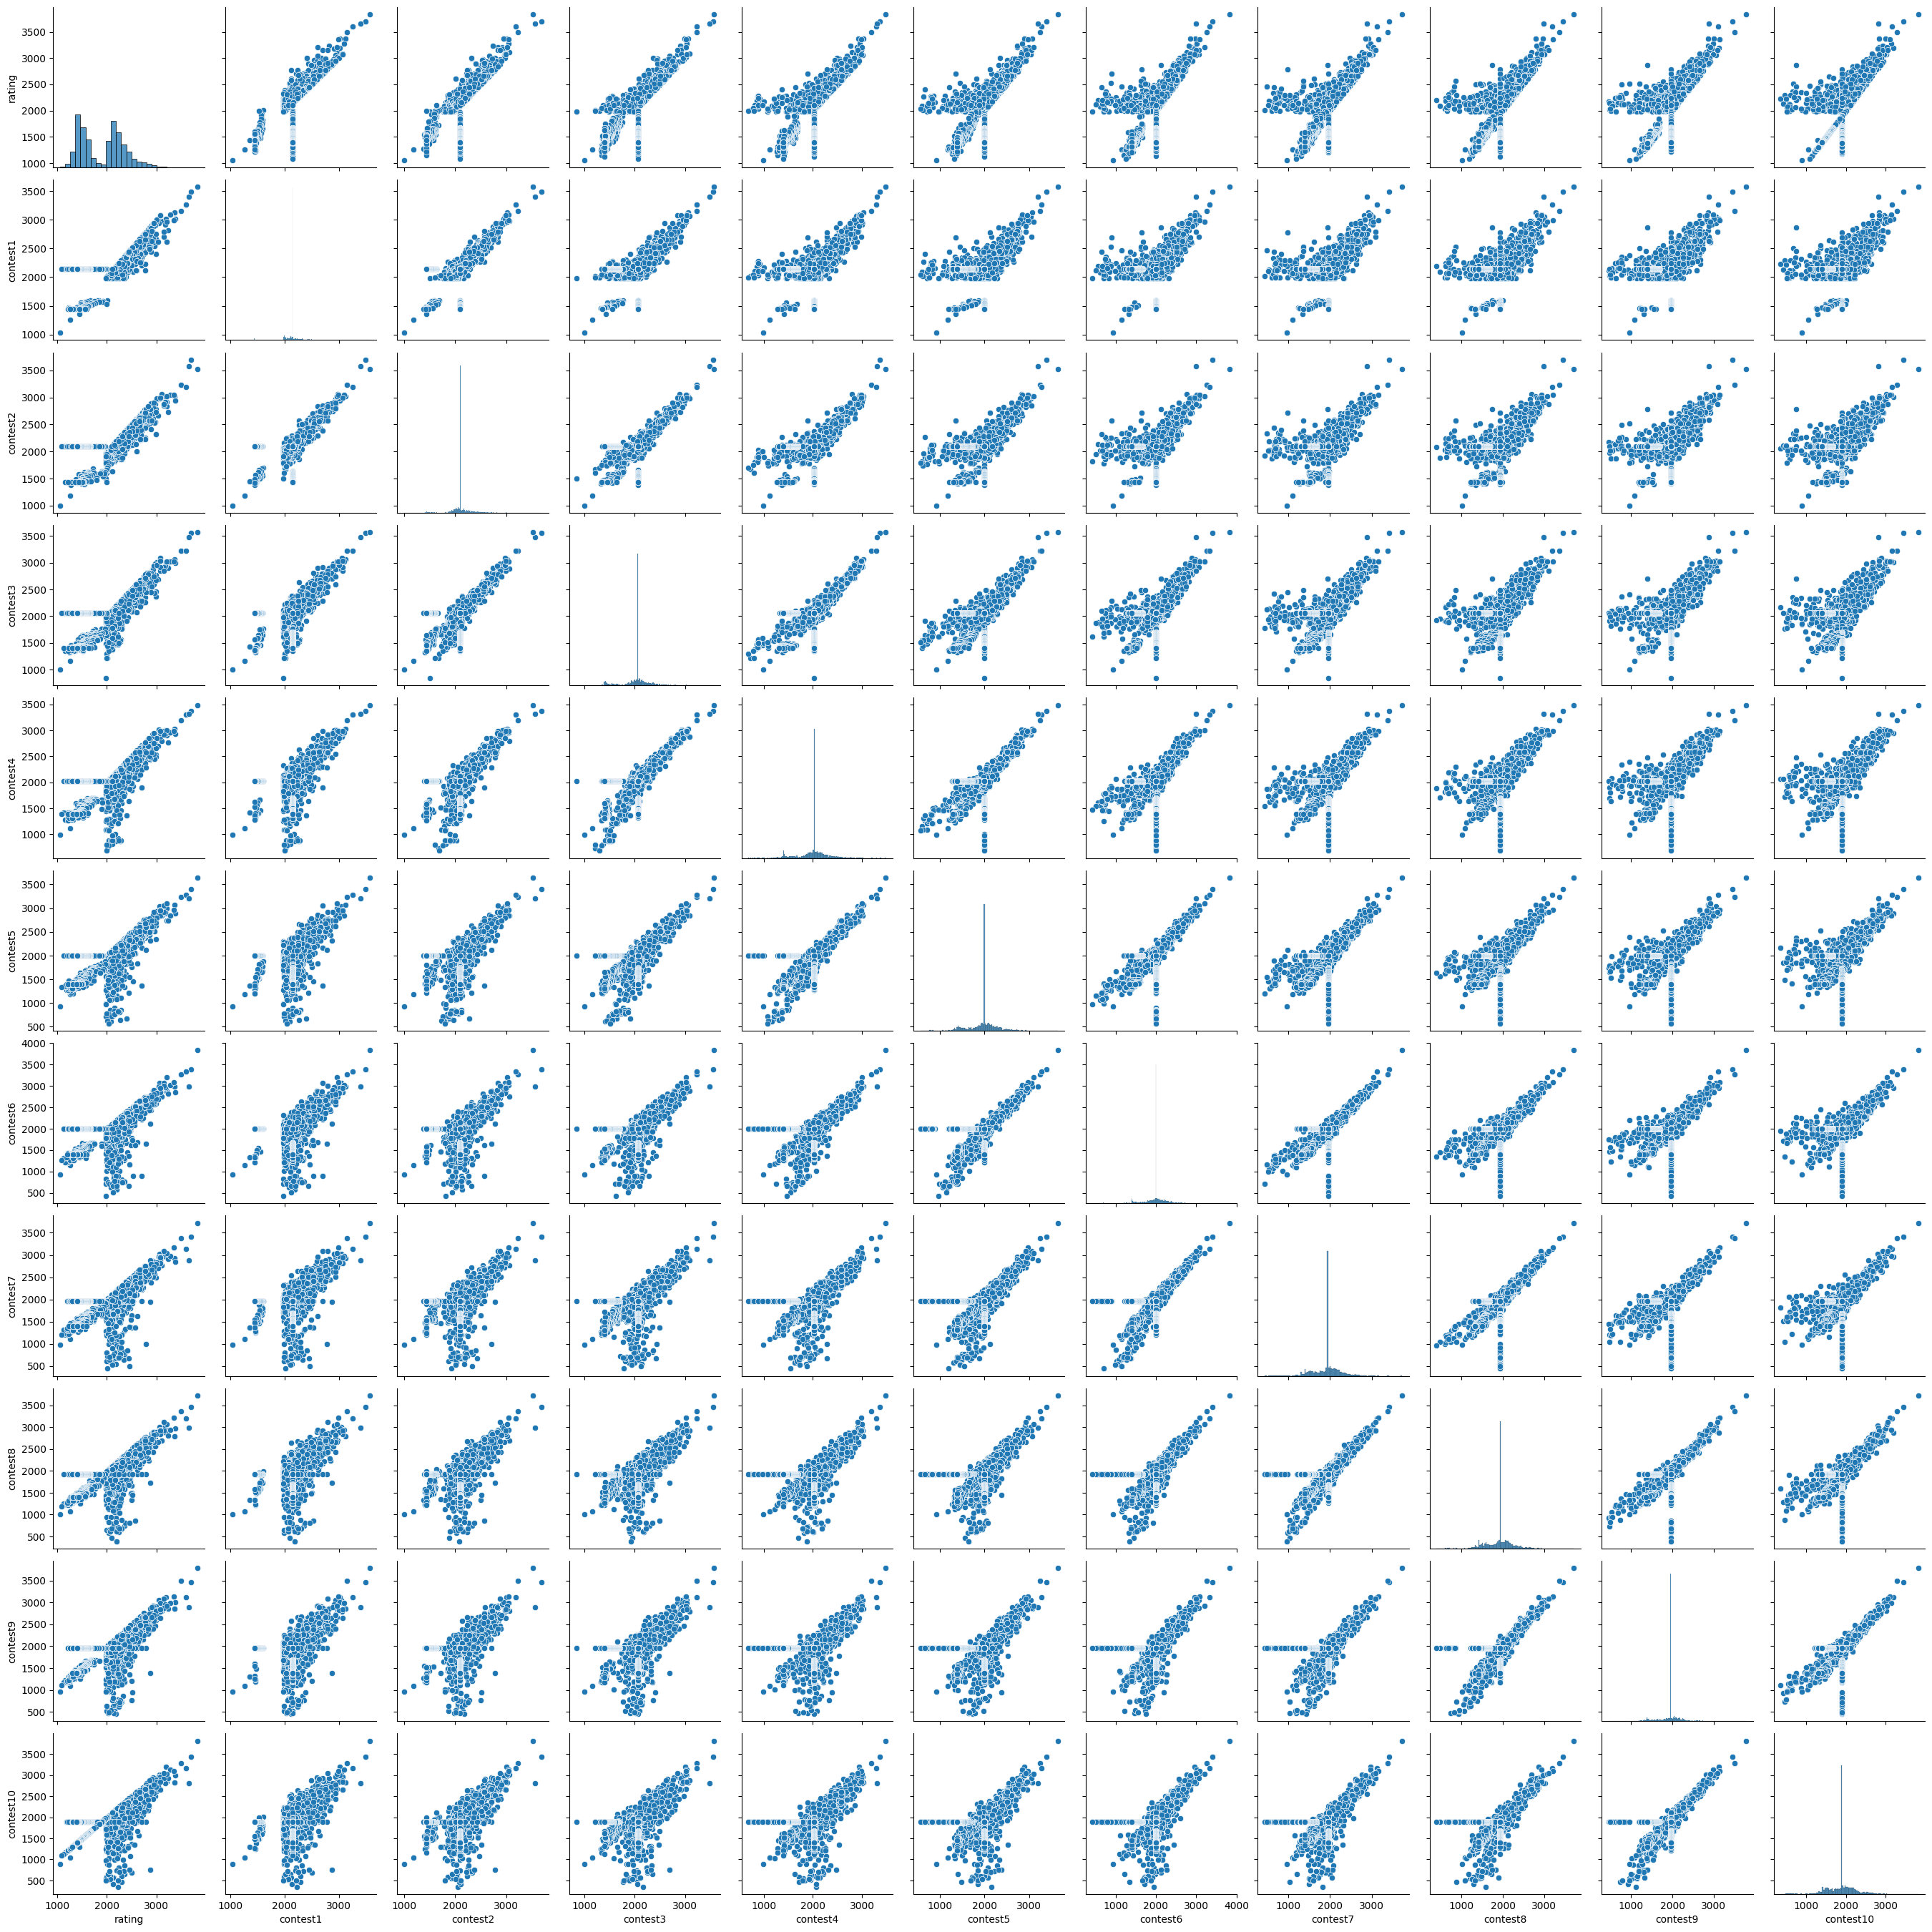

In [13]:
sns.pairplot(df_c, vars=df_c.columns)
plt.show()

## Scaling Model

In [14]:
data = df_c.values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [15]:
x = data[:, 1:]
y = data[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [16]:
def training_regression(model,name,ax=None):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print("MSE: ", mse)
    print("r2: ", r2)
    
    return r2, mse

In [17]:
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()
lnr = LinearRegression()
xgbr = XGBRegressor()

models = [rfr, abr, gbr, etr, lnr, xgbr]
names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees", "Linear Regression", "XGBoost"]

In [18]:
mses = []
r2s = []
for i, j in zip(models, names):
    print("*"*30)
    print(j)
    r2, mse = training_regression(i,j,ax=None)
    mses += [mse]
    r2s += [r2]
    print("\n\n")

******************************
Random Forest
MSE:  0.00032452549228522104
r2:  0.9867482507724494



******************************
Ada Boost
MSE:  0.0020964869705951436
r2:  0.9143915647503688



******************************
Gradient Boosting
MSE:  0.0006813420358764657
r2:  0.9721779212657715



******************************
Extra Trees
MSE:  0.0003342019736347233
r2:  0.9863531190885078



******************************
Linear Regression
MSE:  0.01375969314325586
r2:  0.43813349854741857



******************************
XGBoost
MSE:  0.00038851800675729917
r2:  0.9841351655930606





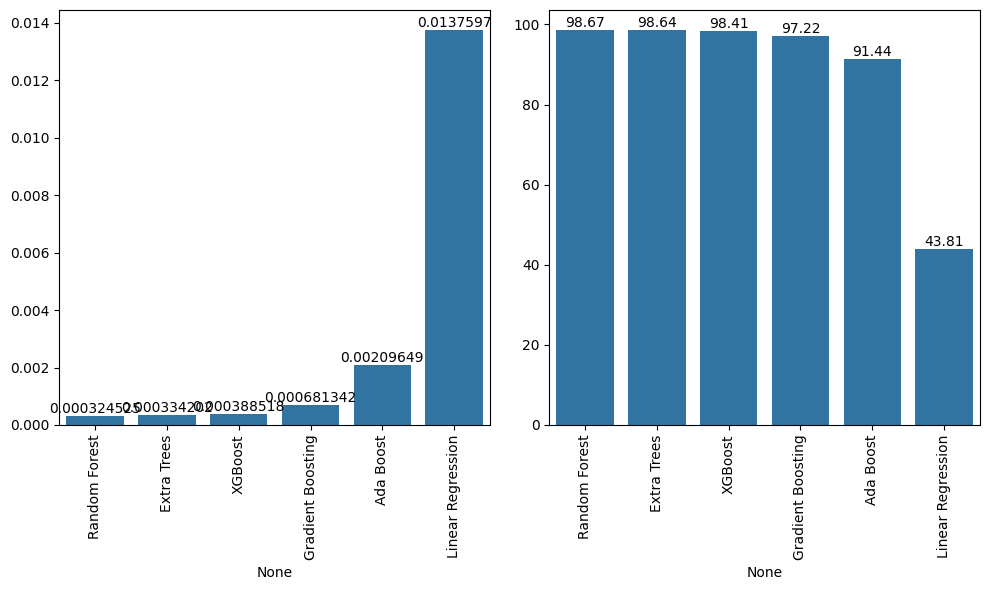

In [19]:
dt_r = pd.DataFrame({"mse": mses, "r2": r2s}, index=names)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
dt_r = dt_r.sort_values("mse", ascending=True)
sns.barplot(x=dt_r.index, y=dt_r.iloc[:, 0].values, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

dt_r = dt_r.sort_values("r2", ascending=False)
dt_r["r2"] = round(dt_r["r2"]*100, 2)
sns.barplot(x=dt_r.index, y=dt_r.iloc[:, 1].values, ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Training model Random Forest
MSE:  0.0003017296018010925
r2:  0.9876791034521177
Model Random Forest trained. Score: 0.9876791034521177
Training model Ada Boost
MSE:  0.001789907434609104
r2:  0.9269105046357295
Model Ada Boost trained. Score: 0.9269105046357295
Training model Gradient Boosting
MSE:  0.0006798872606284817
r2:  0.9722373258956912
Model Gradient Boosting trained. Score: 0.9722373258956912
Training model Extra Trees
MSE:  0.000321638788041929
r2:  0.9868661271231078
Model Extra Trees trained. Score: 0.9868661271231078
Training model Linear Regression
MSE:  0.01375969314325586
r2:  0.43813349854741857
Model Linear Regression trained. Score: 0.43813349854741857
Training model XGBoost
MSE:  0.00038851800675729917
r2:  0.9841351655930606
Model XGBoost trained. Score: 0.9841351655930606


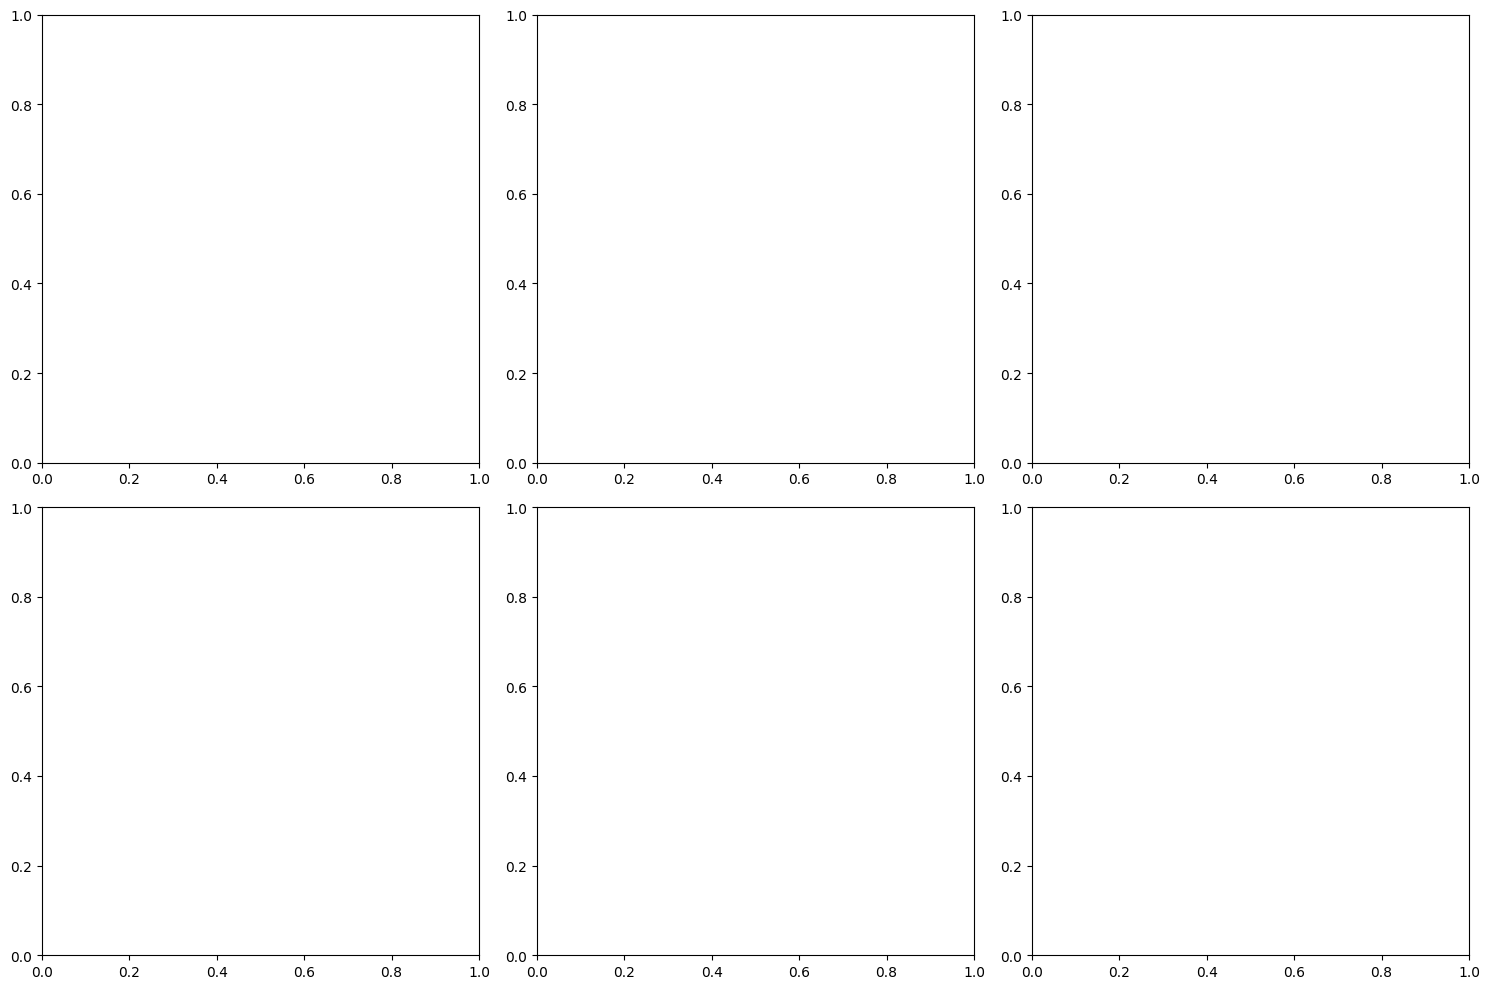

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
index = 0
reports = []
scores = []

for i in range(2):
    for j in range(3):
        print(f"Training model {names[index]}")
        score, report = training_regression(models[index], names[index], axes[i][j])
        print(f"Model {names[index]} trained. Score: {score}")
        scores.append(score)
        reports.append(report)
        index += 1

plt.tight_layout()
plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_rfr = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_abr = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

param_grid_gbr = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

param_grid_etr = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgbr = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0]
}

param_grid_lnr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}


# Define a list of regression models
models = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), XGBRegressor(), LinearRegression()]

# Define a list of parameter grids for each model
param_grids = [param_grid_rfr, param_grid_abr, param_grid_gbr, param_grid_etr, param_grid_xgbr, param_grid_lnr]

# Define lists to store best models and scores
best_models = []
best_scores = []

# Iterate over each model and its corresponding parameter grid
for model, param_grid in zip(models, param_grids):
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    grid_search.fit(x_train, y_train)
    
    # Get the best model and its score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    
    # Append the best model and its score to the lists
    best_models.append(best_model)
    best_scores.append(best_score)

# Print the best MSE scores and corresponding models
for name, score, model in zip(names, best_scores, best_models):
    print(f"Best MSE Score for {name}: {-score}")
    print(f"Best Parameters: {model.get_params()}")
    print()


Best MSE Score for Random Forest: 0.00039163256065074604
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Best MSE Score for Ada Boost: 0.00168455148325778
Best Parameters: {'estimator': None, 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 150, 'random_state': None}

Best MSE Score for Gradient Boosting: 0.0004700134234324929
Best Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fra

In [22]:
from sklearn.metrics import make_scorer, r2_score

# Define a custom scorer for R2 score
r2_scorer = make_scorer(r2_score)

# Iterate over each model and its corresponding parameter grid
for model, param_grid in zip(models, param_grids):
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=r2_scorer, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    # Get the best model and its score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    
    # Append the best model and its score to the lists
    best_models.append(best_model)
    best_scores.append(best_score)

# Print the best R2 scores and corresponding models
for name, score, model in zip(names, best_scores, best_models):
    print(f"Best R2 Score for {name}: {score}")
    print(f"Best Parameters: {model.get_params()}")
    print()


Best R2 Score for Random Forest: -0.00039163256065074604
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Best R2 Score for Ada Boost: -0.00168455148325778
Best Parameters: {'estimator': None, 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 150, 'random_state': None}

Best R2 Score for Gradient Boosting: -0.0004700134234324929
Best Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fra

In [23]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and print results
def perform_cross_validation(model, X, y, cv=5, scoring='neg_mean_squared_error'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    print("Cross-validation scores:", scores)
    print("Mean Cross-validation score:", scores.mean())
    print("Standard Deviation of Cross-validation scores:", scores.std())

# Perform cross-validation for each model
for name, model in zip(names, best_models):
    print(f"Cross-validation results for {name}:")
    perform_cross_validation(model, x_train, y_train)
    print()


Cross-validation results for Random Forest:
Cross-validation scores: [-0.00031661 -0.00045939 -0.0004492  -0.00041364 -0.00028704]
Mean Cross-validation score: -0.00038517584442910766
Standard Deviation of Cross-validation scores: 7.035171189674563e-05

Cross-validation results for Ada Boost:
Cross-validation scores: [-0.001488   -0.00190634 -0.00165376 -0.00179026 -0.00149687]
Mean Cross-validation score: -0.0016670446045777922
Standard Deviation of Cross-validation scores: 0.0001634872369580296

Cross-validation results for Gradient Boosting:
Cross-validation scores: [-0.0004114  -0.00048451 -0.00052206 -0.00055895 -0.00037573]
Mean Cross-validation score: -0.00047053095920907473
Standard Deviation of Cross-validation scores: 6.804672519855029e-05

Cross-validation results for Extra Trees:
Cross-validation scores: [-0.00022775 -0.00039125 -0.00032761 -0.00033001 -0.00025393]
Mean Cross-validation score: -0.00030610859267566433
Standard Deviation of Cross-validation scores: 5.85568281